<a href="https://colab.research.google.com/github/ZoryAce/Topicos/blob/main/ENTREGA1/TALLER1/E1_UsedVehiclePricePredictionDrift2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# E1 - Data Drift in Used Vehicle Price Prediction

**INTEGRANTES:**
- Luis Alejandro Garzón Ramirez
- Zorayda Acevedo Jimenez
- Yulieth Danitza Aguillón Ortega

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [2]:
%matplotlib inline
import pandas as pd

Este código carga un conjunto de datos en formato CSV desde un archivo comprimido alojado en un repositorio de GitHub.

In [ ]:
data = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTrain_carListings.zip')

Se muestra las primeras 5 filas del DataFrame data.

In [ ]:
data.head()

Price  Year  Mileage State       Make        Model
0  21490  2014    31909    MD     Nissan    MuranoAWD
1  21250  2016    25741    KY  Chevrolet  CamaroCoupe
2  20925  2016    24633    SC    Hyundai        Santa
3  14500  2012    84026    OK       Jeep        Grand
4  32488  2013    22816    TN       Jeep     Wrangler

Se consulta la cantidad de filas y columnas que tienen los datos consultados.

In [ ]:
data.shape

(500000, 6)

Se muestra el nombre de columnas/variables que tiene la base de datos y el tipo de dato de las variables.

In [ ]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P0.1 (20%)

Complete an exploratory data analysis with the variables in the dataset to determine the relationships between the vehicle price (target feature) and the other features. Remember to separate the analysis between bivariate and multivariate, in order to see the effects of each feature separately and then with a set of features.

Se describe la distribución de la variable Price (Precio) en un conjunto de 500,000 registros de autos.

In [ ]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

- Hay 500,000 registros en la variable Price.

- El precio promedio de los autos es $21,144.19.

- La desviación estándar es de	10.753,26,	indica cuánta variabilidad hay en los precios. Cuanto más alto, más dispersos están los datos.  Son relativamente altos, lo que sugiere que los precios varían mucho.

- min (Mínimo)	5,001	el precio más bajo registrado es $5,001. Esto podría indicar autos más antiguos o de baja gama.

- 25% (Primer cuartil - Q1)	13,499	el 25% de los autos cuestan menos de $13,499.

- 50% (Mediana - Q2)	18,450	el 50% de los autos cuestan menos de $18,450. Este es el valor central de la distribución.

- 75% (Tercer cuartil - Q3)	26,998	el 75% de los autos cuestan menos de $26,998. Solo el 25% más caro está por encima de este valor.

- max (Máximo)	79,999	el precio más alto encontrado es $79,999. Esto puede representar autos de lujo o con equipamiento premium.


Se revisa la cantidad de valores faltantes en cada columna del la base de datos y muestra los resultados en un formato claro. Este nos indica que en esta base no tenemos valores faltantes

In [ ]:
# Verificar completitud de variables
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nCompletitud de Variables:")
print(missing_df)


Completitud de Variables:
         Missing Values  Percentage
Price                 0         0.0
Year                  0         0.0
Mileage               0         0.0
State                 0         0.0
Make                  0         0.0
Model                 0         0.0


## **ANALISIS BIVARIADO**

En el siguiente grafico podemos ver la tendencia creciente del precio con el año.  Los autos más recientes tienden a tener precios más altos. Los autos más antiguos tienen precios más bajos en general, pero con algunos valores altos que pueden ser autos de lujo o coleccionables.

La densidad de puntos por año sugiere que hay más registros de autos recientes que de autos antiguos. Se nota un patrón de bandas verticales, lo que puede indicar que los precios se agrupan en ciertos rangos específicos por año.

<Axes: xlabel='Year', ylabel='Price'>

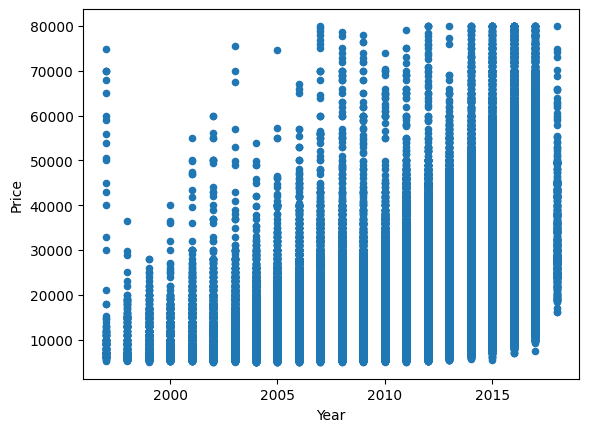

In [ ]:
data.plot(kind='scatter', y='Price', x='Year')

En la siguiente grafica: Se observa una relacion negativa entre el kilometraje y el precio, autos con menor kilometraje tienden a tener precios más altos. Autos con alto kilometraje suelen tener precios más bajos y se observa una alta concentración de autos con bajo kilometraje

La mayoría de los autos tienen kilometrajes bajos (menores a 200,000 km). En esta zona, los precios varían ampliamente, desde autos baratos hasta autos de lujo. Se ven valores atípicos (outliers)

Existen algunos autos con kilometrajes extremadamente altos (superiores a 1,000,000 km). También hay autos con precios elevados incluso con alto kilometraje, lo que puede deberse a modelos de lujo o clásicos.

<Axes: xlabel='Mileage', ylabel='Price'>

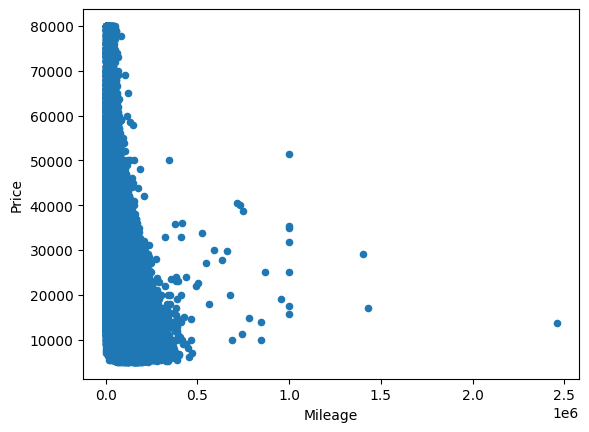

In [ ]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

En la siguiente grafica se puede realizar una analisis de correlación. La correlación positiva entre Precio y Año (+0.48), es decir, cuanto más nuevo es el auto (mayor Year), mayor es su precio.

Correlación negativa entre Precio y Kilometraje (-0.47), es decir, a mayor kilometraje, menor es el precio del auto. Relación moderada a débil, ya que hay otros factores que influyen en el precio.

Correlación negativa fuerte entre Año y Kilometraje (-0.75), es decir, los autos más nuevos suelen tener menor kilometraje, lo que es lógico. Relación fuerte, lo que indica que el año de fabricación es un buen predictor del kilometraje.

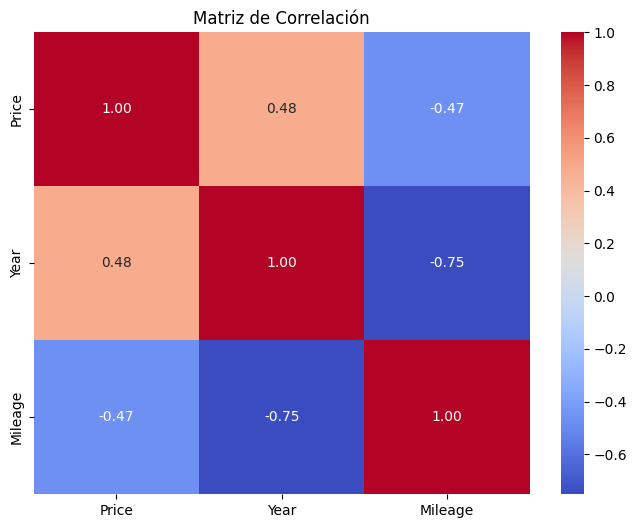

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Price', 'Year', 'Mileage']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Análisis bivariado
numerical_features = ['Price', 'Year', 'Mileage']
categorical_features = ['State', 'Make']

En la isguiente grafica de "Distribucion de precio y estado", se observa que algunos estados tienen precios más altos en general (cajas más elevadas), por ejemplo: California (CA), Connecticut (CT), Maryland (MD), Virginia (VA), Nueva York (NY) y Nueva Jersey (NJ). Otros tienen una gran dispersión en precios, lo que indica mucha variabilidad en el mercado.

Se identifican los precios más bajo de vehiculo por tener la mediana más baja y las cajas situadas más abajo en el gráfico. Por ejemplo:  West Virginia (WV), Kentucky (KY), Wyoming (WY), Dakota del Sur (SD), Iowa (IA) y Montana (MT)

Tambien se observa presencia de outliers: En todos los estados hay precios que se consideran fuera de lo normal Probablemente sean autos de lujo o con características especiales.

Por otra parte en la grafica de "Distribucion de precio y marca" se observa que existen grandes diferencias de precio entre marcas, con un claro grupo de marcas de lujo en la parte alta y marcas más accesibles en la parte baja. Marcas con precios más altos:
Tesla, Porsche, Bentley, Land Rover, Lexus, Mercedes-Benz y BMW. Estas marcas tienen una mediana de precio alta y una distribución con valores altos. También tienen una mayor cantidad de outliers elevados, lo que sugiere que algunas versiones de sus autos pueden ser significativamente más caras. Por otra parte, estan las marcas con con precios más bajos como: Suzuki, Fiat, Pontiac, Mercury y Mitsubishi

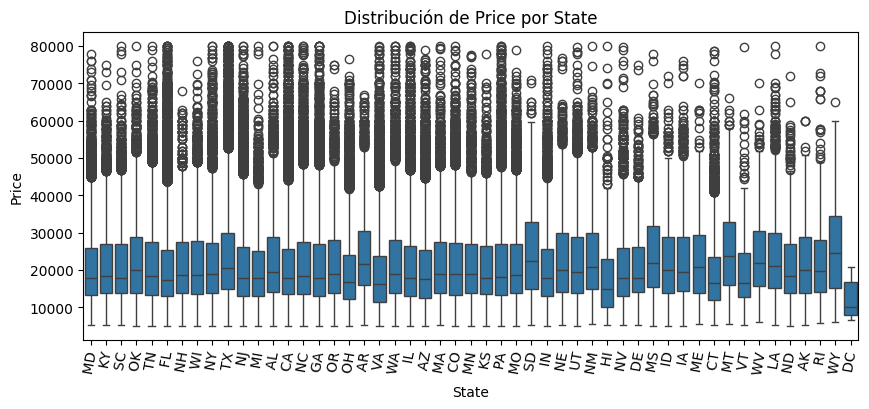

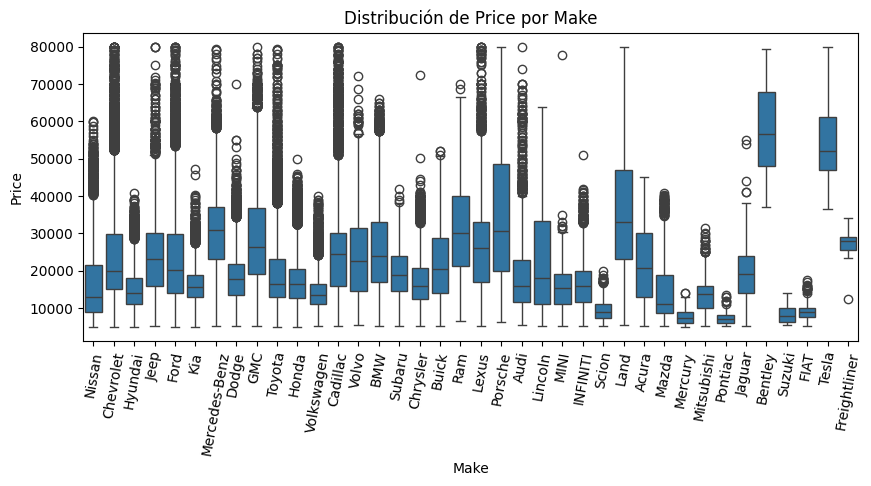

In [ ]:
# Boxplots para variables categóricas
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature], y=data['Price'])
    plt.xticks(rotation=80)
    plt.title(f'Distribución de Price por {feature}')
    plt.show()

# **ANALISIS MULTIVARIADO**

En el análisis multivariado vemos un pairplot, que muestra la relación entre las variables Price (Precio), Year (Año) y Mileage (Kilometraje) a través de gráficos de dispersión y distribuciones. Algunas conclusiones clave son:
- Price (Precio): La mayoría de los autos tienen precios bajos, con una disminución en la frecuencia a medida que aumenta el precio.
- Year (Año): Hay más autos recientes en el conjunto de datos, especialmente después del 2000.
- Mileage (Kilometraje): La distribución muestra que la mayoría de los autos tienen un kilometraje relativamente bajo, aunque hay algunos con valores extremadamente altos.

Hay algunos autos con precios muy altos y kilometrajes extremadamente elevados, que podrían distorsionar las relaciones generales.

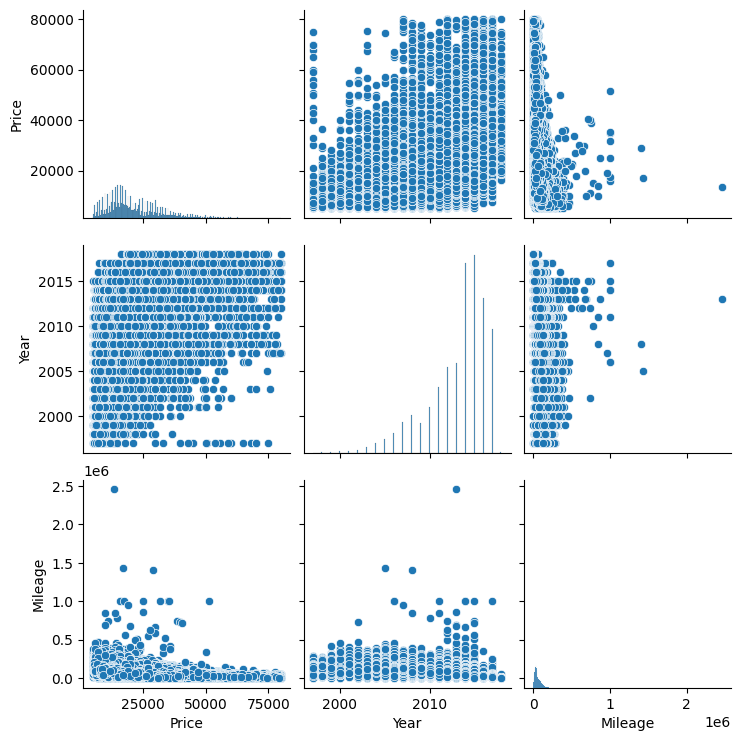

In [ ]:
# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(data[numerical_features])
plt.show()

En la siguiente grafica se observa la relación negativa entre Precio, Kilometraje y marcas:

- Se confirma que a medida que aumenta el kilometraje, el precio del auto tiende a disminuir.
- Hay una gran concentración de autos con bajo kilometraje y precios bajos.

Variabilidad entre marcas:
- Se han usado colores distintos para representar diferentes marcas de autos.
- Sin embargo, debido a la cantidad de datos, los puntos se superponen mucho y no se aprecia una diferenciación clara por marca.

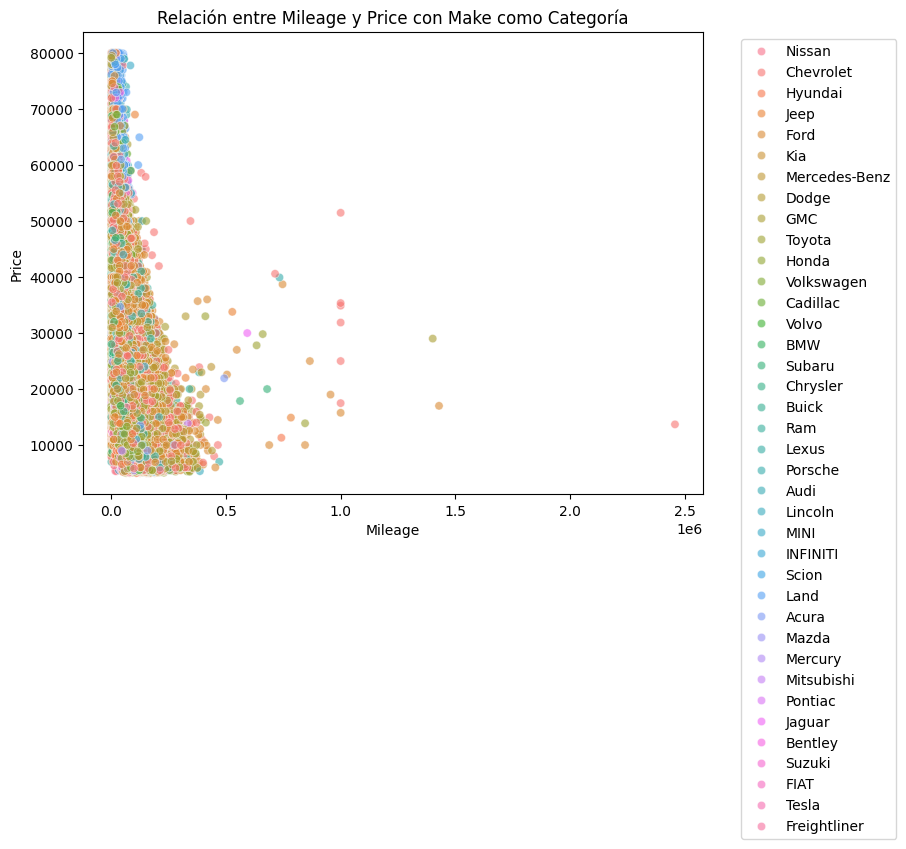

In [ ]:
# Scatterplot con hue para ver la influencia de una variable categórica
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Mileage'], y=data['Price'], hue=data['Make'], alpha=0.6)
plt.title('Relación entre Mileage y Price con Make como Categoría')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Exercise P0.2 (20%)




Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model'] **train model with data until 2010**.

*Evaluation:*

* 10% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
* 10% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Si inicia con el proceso para dejar los valores unicos y poder proceder a realizar enriquecimiento de informacion segun el modelo de autos.

In [ ]:
modelos = data.Model.drop_duplicates()
modelos.to_excel("datos_unicos.xlsx", index=False)

Visualizar los valores unicos de los modelos de autos.

In [ ]:
data.Model.unique()

array(['MuranoAWD', 'CamaroCoupe', 'Santa', 'Grand', 'Wrangler',
       'F-1504WD', 'ExplorerXLT', 'Sonata4dr', 'SorentoSX',
       'M-ClassML350', 'JourneyFWD', 'Super', 'Sierra', 'Silverado',
       'CamryLE', 'OdysseyEX-L', 'Pathfinder4WD', 'AcadiaFWD', 'EscapeSE',
       'Express', 'F-150XLT', 'EdgeSEL', 'Passat4dr', 'EdgeSport',
       'FlexLimited', 'CTS', 'S60T5', 'CompassSport', '5', 'Impreza',
       'RogueFWD', 'Civic', 'CruzeSedan', 'Accord', 'AccordLX',
       'PriusTwo', 'SorentoEX', 'PilotEX-L', 'Town', 'Legacy',
       'RegalTurbo', 'Yukon2WD', '25004WD', 'IS', 'Tacoma2WD',
       'X3xDrive28i', 'Ranger2WD', 'Focus4dr', 'Escape4WD',
       'SonataLimited', '200Limited', 'CR-VLX', 'CayenneAWD', 'MalibuLT',
       'CherokeeLimited', 'TundraSR5', 'F-150Lariat', 'Impala4dr',
       'Q7quattro', 'Tiguan2WD', 'CR-VEX', 'Suburban4WD', 'F-350XLT',
       'Regal4dr', '350Z2dr', 'XC60T6', 'ElantraLimited', '300Touring',
       'Camry4dr', 'Liberty4WD', 'MustangPremium', 'Legacy2.5

Se realiza el proceso de enriquecimiento de datos usando información realacionada con el modelo del vehiculo, y a cada modelo proporcionando informacion adicional entrega por chat gpt. Lo anterior, se realiza teniendo en cuenta que la variable "Model" tiene más e 600 tipologias diferentes.

In [5]:
datos_enriquecidos = pd.read_excel("https://github.com/ZoryAce/Topicos/raw/main/ENTREGA1/TALLER1/datos_enriquecidos.xlsx")

# Realizar el join
data = data.merge(datos_enriquecidos, on="Model", how="left")
data =data.drop(columns = "Model")

# Mostrar las primeras filas del resultado
data.head()

Este código prepara los datos para entrenamiento de un modelo de Machine Learning mediante:

- Codificación One-Hot de variables categóricas.
- Mantenimiento de variables numéricas relevantes.
- Creación de una nueva variable "Años transcurridos" para mejorar la interpretación.
- Eliminación de la variable redundante "Year".

In [ ]:
# Aplicar One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop="first")
encoded_cols = encoder.fit_transform(data[['State', 'Make','TipoCombustible']])

# Convertir a DataFrame con nombres correctos
encoded_col_names = encoder.get_feature_names_out(['State', 'Make','TipoCombustible'])
data_encoded = pd.DataFrame(encoded_cols, columns=encoded_col_names, index=data.index)  # Asegurar que los índices coincidan

# Concatenar con las columnas numéricas
data = pd.concat([data[['Year', 'Mileage', 'Price','Cilindraje','NumeroPuertas','Aceleracion100km/h(s)']], data_encoded], axis=1)

data['Años transcurridos'] = 2018 - data['Year']
data.drop(columns = "Year", inplace = True)
data.head()

Mileage  Price  Cilindraje  NumeroPuertas  Aceleracion100km/h(s)  \
0    31909  21490         4.0              4               8.283537   
1    25741  21250         3.0              2               4.458682   
2    24633  20925         6.2              5               5.219662   
3    84026  14500         2.0              4               7.254475   
4    22816  32488         2.5              2               7.390779   

   State_ AL  State_ AR  State_ AZ  State_ CA  State_ CO  ...  Make_Subaru  \
0        0.0        0.0        0.0        0.0        0.0  ...          0.0   
1        0.0        0.0        0.0        0.0        0.0  ...          0.0   
2        0.0        0.0        0.0        0.0        0.0  ...          0.0   
3        0.0        0.0        0.0        0.0        0.0  ...          0.0   
4        0.0        0.0        0.0        0.0        0.0  ...          0.0   

   Make_Suzuki  Make_Tesla  Make_Toyota  Make_Volkswagen  Make_Volvo  \
0          0.0         0.0          0.0              0.0         0.0   
1          0.0         0.0          0.0              0.0         0.0   
2          0.0         0.0          0.0              0.0         0.0   
3          0.0         0.0          0.0              0.0         0.0   
4          0.0         0.0          0.0              0.0         0.0   

   TipoCombustible_Eléctrico  TipoCombustible_Gasolina  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       1.0   
4                        0.0                       0.0   

   TipoCombustible_Híbrido  Años transcurridos  
0                      0.0                   4  
1                      0.0                   2  
2                      1.0                   2  
3                      0.0                   6  
4                      0.0                   5  

[5 rows x 96 columns]

Este código realiza una selección de características en un conjunto de datos, específicamente eliminando la variable objetivo "Price" de la lista de características independientes.

In [ ]:
# para facilidad de manejo se hace el conjunto de todas las features
features = data.columns.tolist()
features.remove('Price')

Se realiza la validación de la nueva variable transformada, con el fin de conocer el contenido final de la variable. Esta variable indica el numero de años transcurridos desde el año de creación del vehiculo versus la fecha más actual de los datos, en este caso 2018.

In [ ]:
data['Años transcurridos'].unique()

array([ 4,  2,  6,  5,  1,  8,  3, 14,  7, 10, 11,  9, 13, 19, 15,  0, 16,
       12, 17, 21, 18, 20])

De acuerdo con las instrucciones del ejercicio, este código divide el conjunto de datos en entrenamiento (df_train) y prueba (df_test) según la cantidad de años transcurridos desde la fabricación del vehículo. Df_train hasta 2010 y Df_test despues del 2010.

In [ ]:
# Filtrar datos hasta el 2010 para entrenamiento
df_train = data[data['Años transcurridos'] >= 8]
df_test = data[data['Años transcurridos'] < 8]

**Modelos validados con K-FOLD CV Manual**

**Regresion lineal** - se ejecuta el modelo en la base de entrenamiento. Este código usa validación cruzada K-Fold para evaluar el desempeño de un modelo de regresión lineal en la predicción del precio de los autos. El resultado final es un promedio del error RMSE en los 10 folds, lo que ayuda a entender la capacidad predictiva del modelo.

In [ ]:
from sklearn.linear_model import LinearRegression

# Cargar los datos
df = df_train.copy()

# Separar características (X) y variable objetivo (y)
X = df[features]  # Suponiendo que "Precio" es la variable objetivo
y = df["Price"]

# Número de folds
k = 10
n = len(X)
indices = np.arange(n)
np.random.shuffle(indices)  # Mezclar los índices aleatoriamente

# Dividir los índices en 10 folds
folds = np.array_split(indices, k)

rmse_scores = []

# Implementación manual del K-Fold CV
for i in range(k):
    print(f"Fold {i+1}/{k}")

    # Separar datos de entrenamiento y validación
    test_idx = folds[i]
    train_idx = np.setdiff1d(indices, test_idx)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar el modelo (Random Forest)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    print(f"RMSE Fold {i+1}: {rmse:.4f}")

# Promedio del error en los 10 folds
mean_rmse = np.mean(rmse_scores)
print(f"\nRMSE Promedio en 10-Fold CV: {mean_rmse:.4f}")

Fold 1/10
RMSE Fold 1: 4984.7535
Fold 2/10
RMSE Fold 2: 4862.4322
Fold 3/10
RMSE Fold 3: 4912.4971
Fold 4/10
RMSE Fold 4: 4810.3930
Fold 5/10
RMSE Fold 5: 4818.0212
Fold 6/10
RMSE Fold 6: 4805.5258
Fold 7/10
RMSE Fold 7: 4921.9513
Fold 8/10
RMSE Fold 8: 5037.5926
Fold 9/10
RMSE Fold 9: 4705.6504
Fold 10/10
RMSE Fold 10: 5056.2395

RMSE Promedio en 10-Fold CV: 4891.5057


**RandomForestRegressor** - se ejecuta el modelo en la base de entrenamiento. Este código usa validación cruzada K-Fold para evaluar un Random Forest Regressor en la predicción del precio de los autos. Al final, se obtiene un promedio del error RMSE, lo que ayuda a determinar qué tan bien está funcionando el modelo.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos
df = df_train.copy()

# Separar características (X) y variable objetivo (y)
X = df[features]  # Suponiendo que "Precio" es la variable objetivo
y = df["Price"]

# Número de folds
k = 10
n = len(X)
indices = np.arange(n)
np.random.shuffle(indices)  # Mezclar los índices aleatoriamente

# Dividir los índices en 10 folds
folds = np.array_split(indices, k)

rmse_scores = []

# Implementación manual del K-Fold CV
for i in range(k):
    print(f"Fold {i+1}/{k}")

    # Separar datos de entrenamiento y validación
    test_idx = folds[i]
    train_idx = np.setdiff1d(indices, test_idx)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar el modelo (Random Forest)
    model = RandomForestRegressor(n_estimators=50, random_state=42,n_jobs=-1)
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    print(f"RMSE Fold {i+1}: {rmse:.4f}")

# Promedio del error en los 10 folds
mean_rmse = np.mean(rmse_scores)
print(f"\nRMSE Promedio en 10-Fold CV: {mean_rmse:.4f}")


Fold 1/10
RMSE Fold 1: 3029.8265
Fold 2/10
RMSE Fold 2: 3067.4215
Fold 3/10
RMSE Fold 3: 3127.0649
Fold 4/10
RMSE Fold 4: 3162.6235
Fold 5/10
RMSE Fold 5: 3204.3740
Fold 6/10
RMSE Fold 6: 3205.6135
Fold 7/10
RMSE Fold 7: 3113.2142
Fold 8/10
RMSE Fold 8: 3175.3179
Fold 9/10
RMSE Fold 9: 3247.4630
Fold 10/10
RMSE Fold 10: 3068.8677

RMSE Promedio en 10-Fold CV: 3140.1787


**XGBoost** - se ejecuta el modelo en la base de entrenamiento. Este código usa validación cruzada K-Fold para evaluar un XGBoost Regressor en la predicción del precio de los autos. Al final, se obtiene un promedio del error RMSE, lo que ayuda a determinar qué tan bien está funcionando el modelo.

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Cargar los datos
df = df_train.copy()

# Separar características (X) y variable objetivo (y)
X = df[features]  # Suponiendo que "Precio" es la variable objetivo
y = df["Price"]

# Número de folds
k = 10
n = len(X)
indices = np.arange(n)
np.random.shuffle(indices)  # Mezclar los índices aleatoriamente

# Dividir los índices en 10 folds
folds = np.array_split(indices, k)

rmse_scores = []

# Implementación manual del K-Fold CV con XGBoost
for i in range(k):
    print(f"Fold {i+1}/{k}")

    # Separar datos de entrenamiento y validación
    test_idx = folds[i]
    train_idx = np.setdiff1d(indices, test_idx)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar el modelo XGBoost
    model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    print(f"RMSE Fold {i+1}: {rmse:.4f}")

# Promedio del error en los 10 folds
mean_rmse = np.mean(rmse_scores)
print(f"\nRMSE Promedio en 10-Fold CV: {mean_rmse:.4f}")

Fold 1/10
RMSE Fold 1: 3898.9963
Fold 2/10
RMSE Fold 2: 3946.9477
Fold 3/10
RMSE Fold 3: 3898.2270
Fold 4/10
RMSE Fold 4: 3766.9088
Fold 5/10
RMSE Fold 5: 3924.0205
Fold 6/10
RMSE Fold 6: 3786.3198
Fold 7/10
RMSE Fold 7: 3894.7857
Fold 8/10
RMSE Fold 8: 3800.5330
Fold 9/10
RMSE Fold 9: 3813.8276
Fold 10/10
RMSE Fold 10: 3767.8735

RMSE Promedio en 10-Fold CV: 3849.8440


Se realiza la ejecución del mejor modeo de acuerdo con los resultados del RMSE (más bajo), en este caso Random Forest teniendo en cuenta los resultados del modelo en entrenamiento (datos hasta 2010) y probandolo desde 2011 en adelante

In [ ]:
# Separar características (X) y variable objetivo (y)
X = df_train[features]  # Suponiendo que "Precio" es la variable objetivo
y = df_train["Price"]

model = RandomForestRegressor(n_estimators=50, random_state=42,n_jobs=-1)
# Entrenar el modelo (Random Forest)
model = RandomForestRegressor(n_estimators=50, random_state=42,n_jobs=-1)
model.fit(df_train[features], df_train["Price"])

# Hacer predicciones
y_pred = model.predict(df_test[features])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(df_test["Price"], y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 10623.8553


## Exercise P0.3 (60%)




Make a drift analysis on the target, model and other features to identify whether there is drift in the target or model or its features after 2011.

*Evaluation:*
- 20% - Target drift analysis. Is there drift over car price?
- 20% - Data drift analysis. Is there drift over model features?
- 20% - Model drift analysis. You must make the predictions on the remaining data (after 2011) and validate if there is drift in the model performance over the same train metrics.

In [ ]:
try:
    import evidently
except:
    get_ipython().system('pip install git+https://github.com/evidentlyai/evidently.git')

  Cloning https://github.com/evidentlyai/evidently.git to /tmp/pip-req-build-695xu11t
  Running command git clone --filter=blob:none --quiet https://github.com/evidentlyai/evidently.git /tmp/pip-req-build-695xu11t
  Resolved https://github.com/evidentlyai/evidently.git to commit 2071304fa495ceb8eea26011a389d29c89a1b0ef
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/109.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 23.4 MB/s eta 0:00:00


**Analisis de desviacion de los objetivos**

Este código detecta si la distribución de precios de los autos cambió después de 2011 usando:
- Prueba KS → Para comparar la diferencia entre distribuciones.
- Visualización KDE → Para ver gráficamente cómo cambió la distribución.

Si la prueba KS da un p-value bajo (< 0.05) y las curvas se ven diferentes, significa que hubo un cambio en los precios de autos después de 2011.



KS test for Price Drift - Statistic: 0.5167, p-value: 0.0000


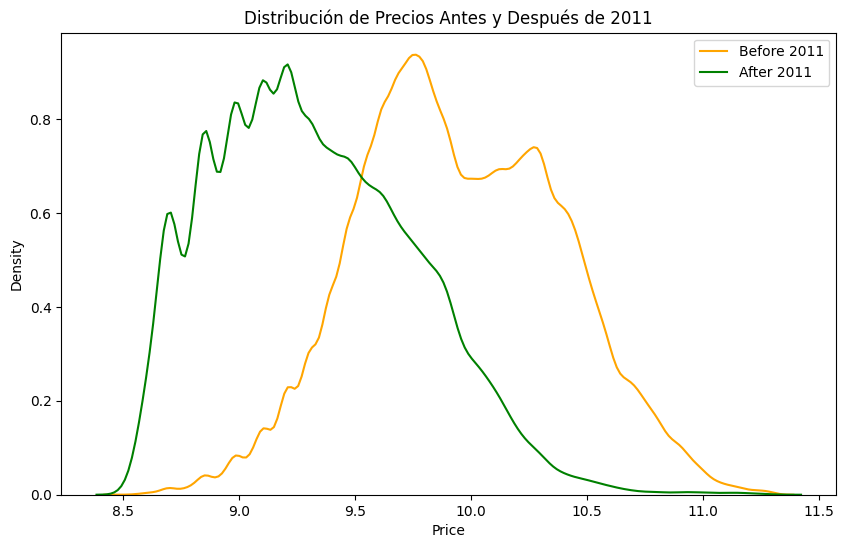

In [ ]:
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos antes y después de 2011
data_post_2011 = df_train
data_pre_2011 = df_test

# Log transformation en el precio para ambos periodos
y_pre_2011 = np.log(data_pre_2011['Price'])
y_post_2011 = np.log(data_post_2011['Price'])

# Prueba KS (Kolmogorov-Smirnov) para detectar desviación en el precio
ks_stat, p_value = ks_2samp(y_pre_2011, y_post_2011)
print(f"KS test for Price Drift - Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

# Visualización de la distribución de precios antes y después de 2011
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pre_2011, label='Before 2011', color='orange')
sns.kdeplot(y_post_2011, label='After 2011', color='green')
plt.title('Distribución de Precios Antes y Después de 2011')
plt.legend()
plt.show()

Antes de 2011 (naranja):
- La distribución es más amplia y está desplazada hacia la derecha.
- Esto sugiere que los precios eran generalmente más altos antes de 2011.

Después de 2011 (verde):
- La distribución es más estrecha y desplazada hacia la izquierda.
- Indica que los precios después de 2011 son más bajos y concentrados en un rango menor.
Conclusiones

Posible reducción en los precios después de 2011, lo que podría deberse a factores como cambios en la economía, nuevas regulaciones o tendencias del mercado.
Mayor variabilidad de precios antes de 2011, reflejando un mercado más disperso.
Distribución más estable después de 2011, sugiriendo menos variabilidad en los precios.


**Análisis de la desviación de datos**

Este código detecta y visualiza cambios en las características numéricas de los autos antes y después de 2011 por cada una de las variales numericas seleccionadas.
- Si la prueba KS da un p-value bajo y las distribuciones son diferentes, indica que hubo cambios en los datos con el tiempo.

KS test for Mileage - Statistic: 0.6719, p-value: 0.0000
KS test for Cilindraje - Statistic: 0.0435, p-value: 0.0000
KS test for NumeroPuertas - Statistic: 0.0185, p-value: 0.0000
KS test for Aceleracion100km/h(s) - Statistic: 0.0418, p-value: 0.0000
KS test for Años transcurridos - Statistic: 1.0000, p-value: 0.0000


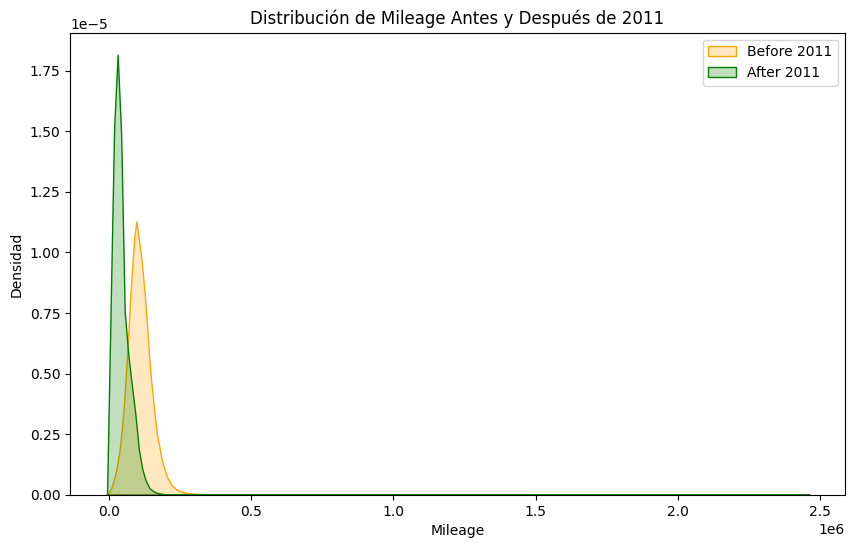

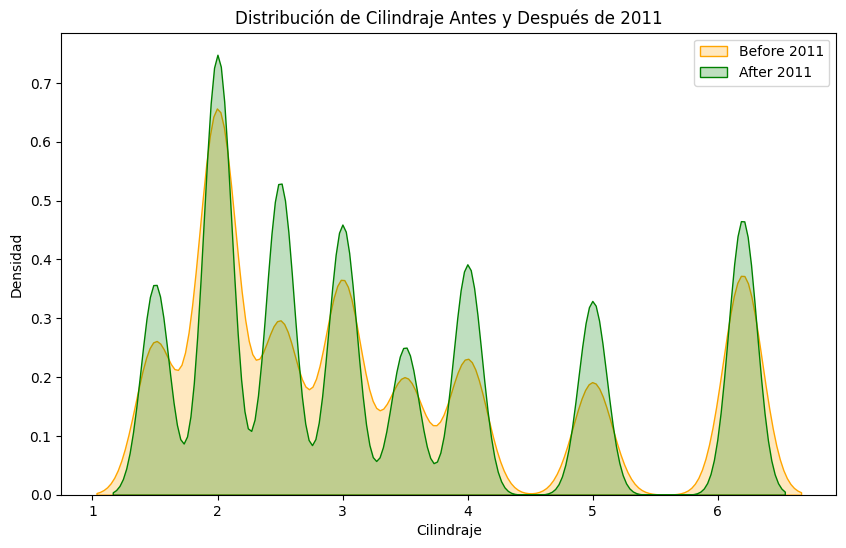

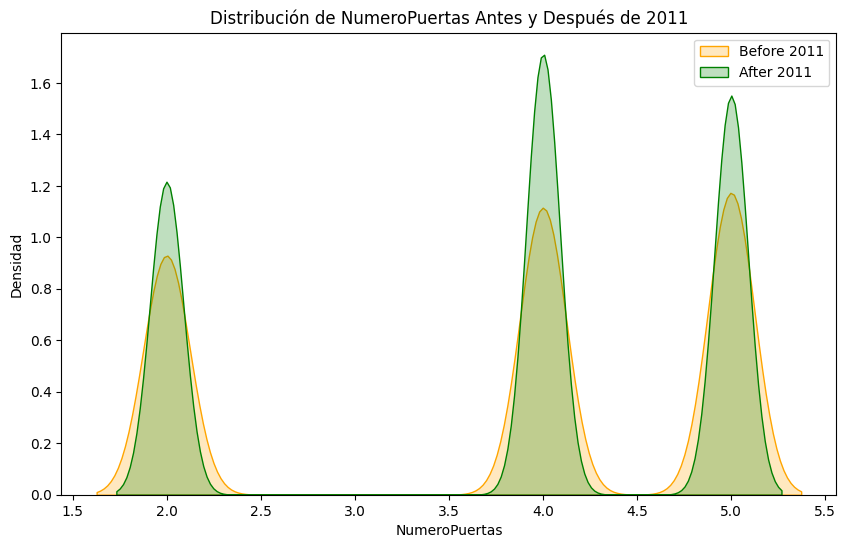

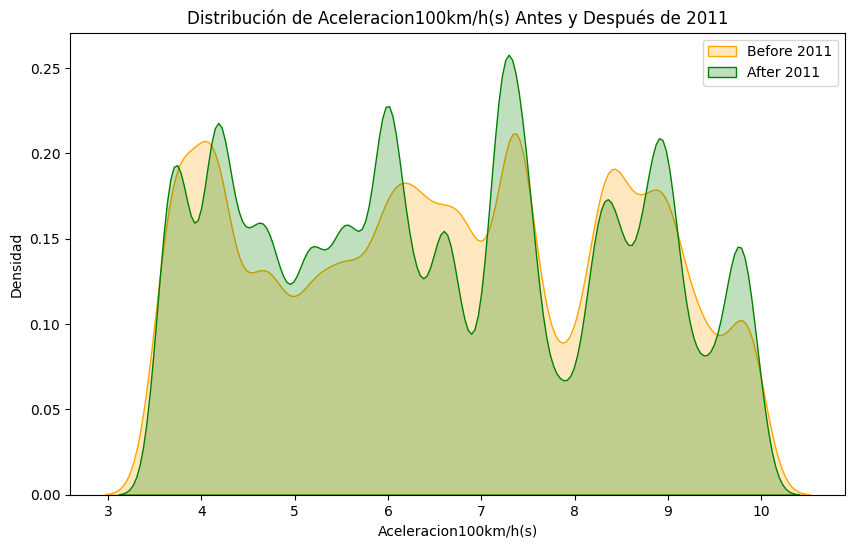

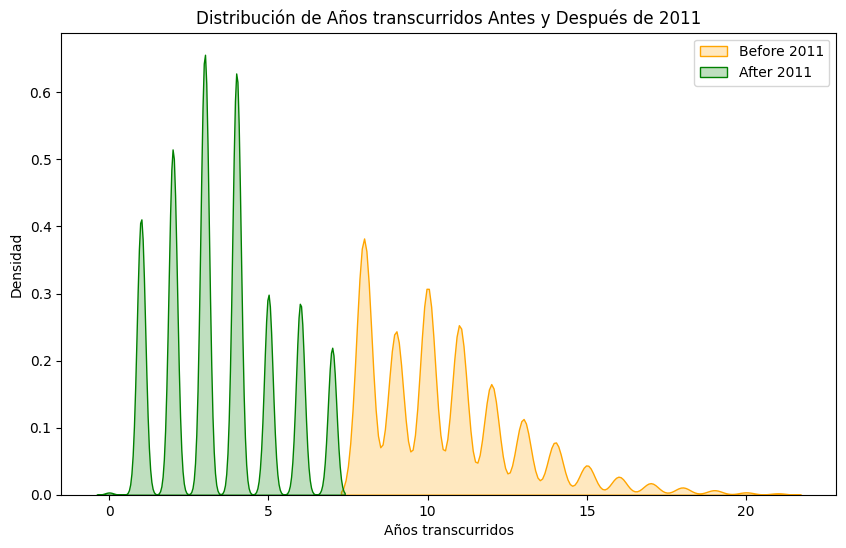

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Extraer solo las columnas numéricas de df_train y df_test
numeric_features = df_train.select_dtypes(include=[np.number]).columns.tolist()

# Excluir variables binarias (solo con valores 0 y 1) y la variable "Price"
numeric_features = [feature for feature in numeric_features if df_train[feature].nunique() > 2 and feature != "Price"]

# Filtrar solo las variables numéricas en df_train y df_test
df_train_numeric = df_train[numeric_features]
df_test_numeric = df_test[numeric_features]

# Prueba KS (Kolmogorov-Smirnov) para detectar desviación en las características numéricas
for feature in numeric_features:
    ks_stat, p_value = ks_2samp(df_train_numeric[feature], df_test_numeric[feature])
    print(f"KS test for {feature} - Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

# Visualización de las distribuciones de las características numéricas antes y después de 2011
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_train_numeric[feature], label='Before 2011', color='orange', fill=True)
    sns.kdeplot(df_test_numeric[feature], label='After 2011', color='green', fill=True)
    plt.title(f'Distribución de {feature} Antes y Después de 2011')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()


- Mileage (Kilometraje) su KS Statistic: 0.6719 (ALTO) → La distribución cambió mucho.

- Cilindraje (Cilindrada del motor): KS Statistic: 0.0435 (BAJO) → Pequeña diferencia en la distribución.

- NumeroPuertas (Cantidad de puertas): KS Statistic: 0.0185 (MUY BAJO) → Las distribuciones son muy similares.

- Aceleracion100km/h(s) (Tiempo de aceleración 0-100 km/h): KS Statistic: 0.0418 (BAJO) → Pequeña diferencia en la distribución.

- Años transcurridos (Edad del auto en años): KS Statistic: 1.0000 (MÁXIMO POSIBLE) → Distribuciones completamente diferentes.


**Análisis de la desviación del modelo**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Filtrar datos hasta el 2010 para entrenamiento
df_train = data[data['Años transcurridos'] >= 8]
df_test = data[data['Años transcurridos'] < 8]

Este código entrena un Random Forest Regressor usando validación cruzada K-Fold (K=10) para predecir el precio de los autos. Luego, calcula y almacena tres métricas de evaluación para cada fold:

- RMSE (Root Mean Squared Error): Error cuadrático medio, penaliza más los errores grandes.
- MAE (Mean Absolute Error): Error absoluto medio, mide la desviación promedio.
- R² (Coeficiente de determinación): Indica qué tan bien el modelo explica la variabilidad de los datos (valor entre 0 y 1).-

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar los datos
df = df_train.copy()

# Separar características (X) y variable objetivo (y)
X = df[features]  # Suponiendo que "Precio" es la variable objetivo
y = df["Price"]

# Número de folds
k = 10
n = len(X)
indices = np.arange(n)
np.random.shuffle(indices)  # Mezclar los índices aleatoriamente

# Dividir los índices en 10 folds
folds = np.array_split(indices, k)

rmse_scores = []
mae_scores = []
r2_scores = []

# Implementación manual del K-Fold CV
for i in range(k):
    print(f"Fold {i+1}/{k}")

    # Separar datos de entrenamiento y validación
    test_idx = folds[i]
    train_idx = np.setdiff1d(indices, test_idx)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar el modelo (Random Forest)
    model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas de evaluación
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Almacenar métricas
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

    print(f"RMSE Fold {i+1}: {rmse:.4f}")
    print(f"MAE Fold {i+1}: {mae:.4f}")
    print(f"R² Fold {i+1}: {r2:.4f}\n")

# Promedio de las métricas en los 10 folds
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

print(f"\nMétricas Promedio en 10-Fold CV:")
print(f"RMSE Promedio: {mean_rmse:.4f}")
print(f"MAE Promedio: {mean_mae:.4f}")
print(f"R² Promedio: {mean_r2:.4f}")

Fold 1/10
RMSE Fold 1: 3139.7399
MAE Fold 1: 1982.5807
R² Fold 1: 0.7583

Fold 2/10
RMSE Fold 2: 3097.8097
MAE Fold 2: 1944.8121
R² Fold 2: 0.7496

Fold 3/10
RMSE Fold 3: 3118.5458
MAE Fold 3: 1990.5876
R² Fold 3: 0.7431

Fold 4/10
RMSE Fold 4: 3219.4834
MAE Fold 4: 1973.5762
R² Fold 4: 0.7477

Fold 5/10
RMSE Fold 5: 3068.0405
MAE Fold 5: 1965.7038
R² Fold 5: 0.7497

Fold 6/10
RMSE Fold 6: 3169.3626
MAE Fold 6: 1952.8590
R² Fold 6: 0.7340

Fold 7/10
RMSE Fold 7: 3264.3252
MAE Fold 7: 2008.1914
R² Fold 7: 0.7444

Fold 8/10
RMSE Fold 8: 3079.5421
MAE Fold 8: 1930.8031
R² Fold 8: 0.7555

Fold 9/10
RMSE Fold 9: 3117.2716
MAE Fold 9: 1953.0834
R² Fold 9: 0.7469

Fold 10/10
RMSE Fold 10: 3107.7761
MAE Fold 10: 1974.8186
R² Fold 10: 0.7296


Métricas Promedio en 10-Fold CV:
RMSE Promedio: 3138.1897
MAE Promedio: 1967.7016
R² Promedio: 0.7459


A continuación, valida si el modelo sigue siendo preciso después de 2011.  Si RMSE y MAE aumentan en post-2011, el modelo podría estar desactualizado.  Si R² disminuye en post-2011, el modelo tiene menos capacidad predictiva.

Se evidencia una lata desviaciónen la desviacion del precio del atuo en la base de entranamiento y pruebas, teniendo en cuenta que la base de entranamiento solo tiene datos hasta 2010 y la base de pruebas tiene datos despues del 2011.

Cuando el rendimiento es bajo comparando la base de entrenamientos vs la base de pruebas, se requerirá:
✔ Actualizar el modelo con más datos post-2011.
✔ Revisar si hubo cambios en la distribución de precios.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocesamiento de los datos post-2011 con el pipeline
X_post_2011 = df_test[features]
y_post_2011 = (df_test["Price"])

# Hacer predicciones
y_pred_post_2011 = model.predict(df_test[features])

# Calcular métricas de rendimiento para los datos post-2011
rmse_post_2011 = np.sqrt(mean_squared_error(df_test["Price"], y_pred_post_2011))
mae_post_2011 = mean_absolute_error(y_post_2011, y_pred_post_2011)
r2_post_2011 = r2_score(y_post_2011, y_pred_post_2011)

# Imprimir métricas
print(f"Rendimiento del modelo Ridge en los datos post-2011:")
print(f"Root Mean Squared Error (RMSE): {rmse_post_2011:.2f}")
print(f"Mean Absolute Error (MAE): {mae_post_2011:.2f}")
print(f"R² Score: {r2_post_2011:.2f}")

Rendimiento del modelo Ridge en los datos post-2011:
Root Mean Squared Error (RMSE): 10777.59
Mean Absolute Error (MAE): 7502.91
R² Score: -0.04


## BONUS:

Perform drift dashboard!

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml

from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

Este código agrega dos nuevas columnas numéricas al DataFrame data, asignando valores aleatorios de manera uniforme dentro de un rango determinado.

In [ ]:
data['num_feature_with_3_values'] = np.random.choice(3, data.shape[0])
data['num_feature_with_2_values'] = np.random.choice(2, data.shape[0])

A continuación se realiza lo siguiente:

✔ Eliminar ruido antes de entrenar un modelo.

✔ Evitar variables binarias si no son necesarias.

✔ Seleccionar características más informativas para el análisis.

In [ ]:
# Extraer solo las columnas numéricas de df_train y df_test
numeric_features = df_train.select_dtypes(include=[np.number]).columns.tolist()

# Excluir variables binarias (solo con valores 0 y 1) y la variable "Price"
numeric_features = [feature for feature in numeric_features if df_train[feature].nunique() > 2 and feature != "Price"]

✔ Estandarizar y organizar datos antes de entrenar un modelo o analizar la calidad de los datos.

✔ Facilitar el uso de herramientas como Evidently AI, que compara distribuciones de datos antes y después de cambios en el conjunto de datos.

✔ Posible uso en validación de datos, detección de cambios en la distribución o sesgos en modelos de Machine Learning.

In [ ]:
numerical_features = numeric_features
column_mapping = ColumnMapping(numerical_features=numerical_features)

Este código prepara las columnas del dataset para su posterior análisis en la validación de datos o modelos. En este caso, solo se consideran variables numéricas, y no hay variables categóricas en uso.

In [ ]:
numerical_features = ['Price', 'Años transcurridos', 'Mileage', 'NumeroPuertas',	'Aceleracion100km/h(s)', 'Cilindraje']
categorical_features = []
column_mapping = ColumnMapping(numerical_features=numerical_features, categorical_features=categorical_features)

Este código utiliza la biblioteca Evidently AI para generar un reporte de "Data Drift" (desviación de datos) comparando dos conjuntos de datos:

df_train (datos de referencia, antes de 2011).
df_test (datos actuales, después de 2011).
El objetivo es detectar cambios significativos en la distribución de los datos entre ambos periodos. Se evidencia que se presenta drift explicado principalmente por la temporalidad de los datos de la base de entrenamiento que tiene datos hasta 2010 y el de pruebas con datos despues del 2011.

In [ ]:
data_drift_report = Report(metrics=[
    DataDriftPreset(),
])

data_drift_report.run(
    reference_data=df_train.sample(1000, random_state=0),
    current_data=df_test.sample(1000, random_state=10),
    column_mapping=column_mapping
)
data_drift_report

Este informe indica que hay un Data Drift significativo en el conjunto de datos. El 83.33% de las columnas (5 de 6) han cambiado significativamente entre los datos de entrenamiento (df_train) y los datos actuales (df_test), es un resultado esperado teniendo en cuenta que los datos de entrenamiento tienen datos hasta el 2010, mientras que los datos de pruebas tienen datos despues del 2010. Teniendo en cuenta que es la estimación de precios de autos el año de creacion del vhiculo influye directamente en su precio final, un auto con màs años cueste menos, un auto más reciente cuesta más.